**АНАЛИТИЧЕСКИЕ ЗАДАЧИ В СФЕРЕ АРЕНДЫ САМОКАТОВ GO FAST**

**ОПИСАНИЕ ПРОЕКТА**

Мы исследуем популярный сервис аренды самокатов GoFast.
У нас есть данные о некоторых пользователях из нескольких городов, а также об их поездках.
Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:
- без подписки

   - абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
   
- с подпиской Ultra абонентская плата — 199 рублей в месяц;

   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.

**ПОСЛЕДОВАТЕЛЬНОСТЬ ВЫПОЛНЕНИЯ ПРОЕКТА**

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчет выручки
6. Проверка гипотез
7. Распределения
8. Вывод

<a id='intro'></a>

**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy import stats as st
from scipy.stats import binom
from IPython.display import display

#### Шаг 1. Загрузка данных

**Пользователи**

In [2]:
try:
    data_us = pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\users_go.csv')
except:    
    data_us = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')


In [3]:
data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_us.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


**Описание исходных данных** 

- В исходном датасете 1565 строк, 5 колонок, 2 типа данных, все строки заполнены, столбцы названы корректно, типы данных соответсвуют

**Поездки**

In [5]:
try:
    data_go = pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\rides_go.csv')
except:
    data_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')


In [6]:
data_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
data_go.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


**Описание исходных данных**

- В исходном датасете 18068 строк, 4 колонки, 3 типа данных, все строки заполнены, столбцы названы корректно, типы данных соотвествуют, кроме даты поездки
- Тип данных для даты поездки нужно изменить на тип datetime

**Подписки**

In [8]:
try:
    data_sub = pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\subscriptions_go.csv')
except:
    data_sub = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')


In [9]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [10]:
data_sub.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Описание исходных данных**

- В исходном датасете 2 строки, 4 колонки, 2 типа данных, пропущенных строк нет, столбцы названы корректно, типы данных соответствуют

#### Шаг 2. Предобработка данных

In [11]:
## Заменим тип данных для data_go['date'] на datetime64

data_go['date'] = pd.to_datetime(data_go['date'], format='%Y-%m-%dT%H:%M:%S',errors='coerce')

data_go['date'].head(5)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: date, dtype: datetime64[ns]

In [12]:
data_go['year'] = data_go['date'].dt.year


In [13]:
data_go['month'] = data_go['date'].dt.month

In [14]:
data_go['day'] = data_go['date'].dt.day

In [15]:
min_date = data_go['date'].min()
min_date

NaT

In [16]:
max_date = data_go['date'].max()
max_date

NaT

- Начало поездок 01.01.2021
- Окончание поездок 30.12.2021
- Таким образом у нас данные за 2021 год

In [17]:
## Проверим дубликаты Пользователей

data_us.duplicated().sum()


31

In [18]:
## Удалим дубликаты пользователей
data_us = data_us.drop_duplicates()
data_us.duplicated().sum()

0

In [19]:
## Проверим дубликаты Поездок

data_go.duplicated().sum()

0

In [20]:
## Выведем обновленную информацию о Пользователях

data_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


**РЕЗУЛЬТАТ ПРЕДОБРАБОТКИ ДАННЫХ**

Для таблицы "Пользователи" 

 - количество строк уменьшилось на 31, т. к. удалили дубликаты

Для таблицы "Поездки"

- тип данных для даты поездки изменился на datetime
- добавили стоблцы "year", "month", "day"

Для таблицы "Тарифы"

- изменений нет

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [21]:
data_us['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

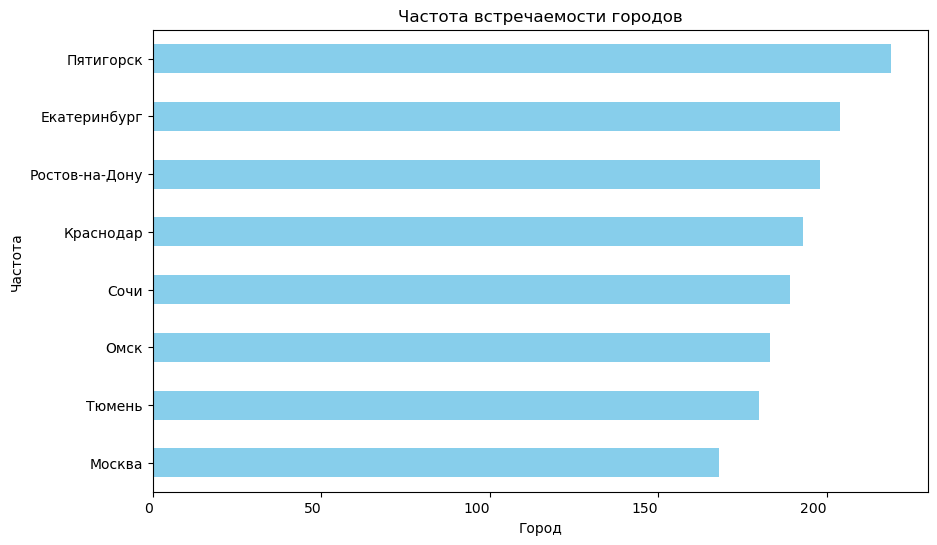

In [22]:
# Отсортируем города по убыванию
city_counts = data_us['city'].value_counts(ascending=True)

# Построим барплот
plt.figure(figsize=(10, 6))
city_counts.plot(kind='barh', color='skyblue')
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота')
plt.xticks(rotation=0, ha='right')  
plt.show()

**Больше всего пользователей в Пятигорске, Ростов, Сочи, Краснодар занимают среднее место, Москва на последнем месте**

##### Соотношение пользователей с подпиской и без подписки

In [23]:
data_us['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [24]:
user_counts = data_us['subscription_type'].value_counts()

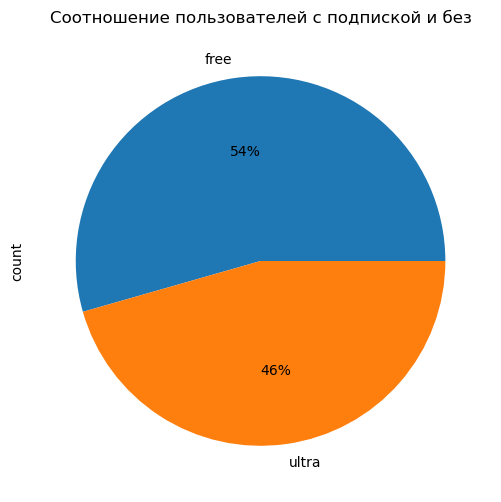

In [25]:
# Построим круговую диаграмму
plt.figure(figsize=(10, 6))
user_counts.plot(kind='pie', autopct='%1.0f%%')
plt.title('Соотношение пользователей с подпиской и без')
plt.show()


**Пользователей с подпиской чуть меньше, чем пользователей без подписки, в целом примерно 50/50**

##### Возраст пользователей

[Импорт библиотек](#intro)

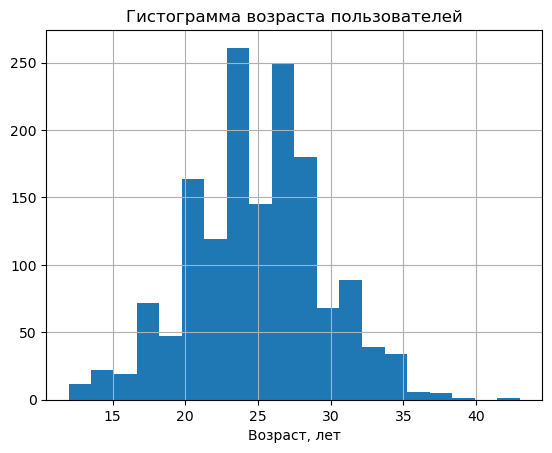

In [26]:
data_us['age'].hist(bins=20)
plt.title('Гистограмма возраста пользователей')
plt.xlabel('Возраст, лет')
plt.show()



In [27]:
data_us['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

- Количество записей в столбце - 1534
- Средний возраст - приблизительно 24.90 лет
- Стандартное отклонение - примерно 4.57 лет
- Минимальный возраст - 12 лет
- 25% пользователей младше 22 лет
- Медианный возраст - 25 лет
- 75% пользователей младше 28 лет
- Максимальный возраст - 43 года


##### Расстояние, которое пользователь преодолел за одну поездку

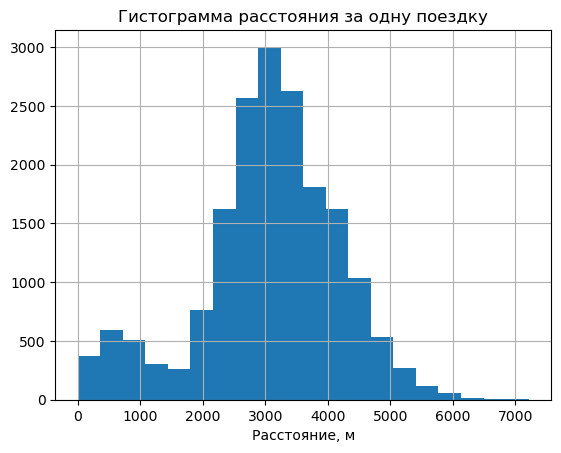

In [28]:
data_go['distance'].hist(bins=20)
plt.title('Гистограмма расстояния за одну поездку')
plt.xlabel('Расстояние, м')
plt.show()

**На гистограмме видно два пика: 500 м и 3000 м. Возможно это объясняется тем, что есть два типа поездок - короткие и длинные. Короткие менее популярны, длинные более популярны. Короткие поездки могут использоваться как пробные для новых пользователей, длинные - для постоянных пользователей**

In [29]:
data_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

- Количество записей - 18068
- Среднее расстояниие одной поездки - 3070 м
- Стандартное отклонение - 1116 м
- Минимальная длина поездки - 0.85 м
- 25 %  поездок короче 2543 м
- 50 % поездок - 3133 м
- 75 % поездок короче 3776 м
- Максимальная длина поездки- 7211 м

**В основном пользователи совершают поездки 2,5 - 4,5 км, что вполне объяснимо: более короткие расстояния можно пройти пешком, более длинные - на машине или общественным транспортом**

##### Продолжительность поездок

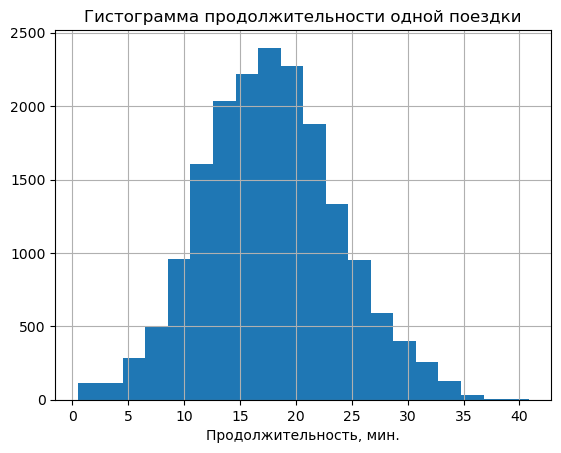

In [30]:
data_go['duration'].hist(bins=20)
plt.title('Гистограмма продолжительности одной поездки')
plt.xlabel('Продолжительность, мин.')
plt.show()

**Длительность одной поездки также распределена нормально, в среднем - 15-20 минут +/-10 минут; длительность поездки коррелирует с расстоянием одной поездки**

#### Шаг 4. Объединение данных

In [31]:
data_go['rides'] = 1

In [32]:
display(data_us.head(5))
display(data_go.head(5))
display(data_sub.head(5))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date,year,month,day,rides
0,1,4409.919140,25.599769,NaT,NaN,NaN,NaN,1
1,1,2617.592153,15.816871,NaT,NaN,NaN,NaN,1
2,1,754.159807,6.232113,NaT,NaN,NaN,NaN,1
3,1,2694.783254,18.511000,NaT,NaN,NaN,NaN,1
4,1,4028.687306,26.265803,NaT,NaN,NaN,NaN,1


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [33]:
## Объединим данные
data_all = data_us.merge(data_go, on='user_id').merge(data_sub, on = 'subscription_type')
data_all.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,day,rides,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,NaT,NaN,NaN,NaN,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,NaT,NaN,NaN,NaN,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,NaT,NaN,NaN,NaN,1,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,NaT,NaN,NaN,NaN,1,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,NaT,NaN,NaN,NaN,1,6,0,199


In [34]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               0 non-null      datetime64[ns]
 8   year               0 non-null      float64       
 9   month              0 non-null      float64       
 10  day                0 non-null      float64       
 11  rides              18068 non-null  int64         
 12  minute_price       18068 non-null  int64         
 13  start_ride_price   18068 non-null  int64         
 14  subscr

**После объединения количество строк новой таблицы data_all совпадает с количеством строк исходной таблицы data_go - 18068**

<a id='alfa'></a>

**Округление длительности поездок**

In [35]:
data_all['duration'] = np.ceil(data_all['duration'])
data_all['duration']

0        26.0
1        16.0
2         7.0
3        19.0
4        27.0
         ... 
18063    20.0
18064    22.0
18065    19.0
18066    17.0
18067    16.0
Name: duration, Length: 18068, dtype: float64

In [59]:
data_ultra = data_all[data_all['subscription_type'] == 'ultra']
data_ultra.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,day,rides,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,NaT,NaN,NaN,NaN,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,NaT,NaN,NaN,NaN,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,NaT,NaN,NaN,NaN,1,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,NaT,NaN,NaN,NaN,1,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,NaT,NaN,NaN,NaN,1,6,0,199


In [60]:
## Создадим новые датафреймф для каждого тарифа
data_free = data_all[data_all['subscription_type'] == 'free']
data_free.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,day,rides,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,NaT,NaN,NaN,NaN,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,NaT,NaN,NaN,NaN,1,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,NaT,NaN,NaN,NaN,1,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,NaT,NaN,NaN,NaN,1,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,NaT,NaN,NaN,NaN,1,8,50,0


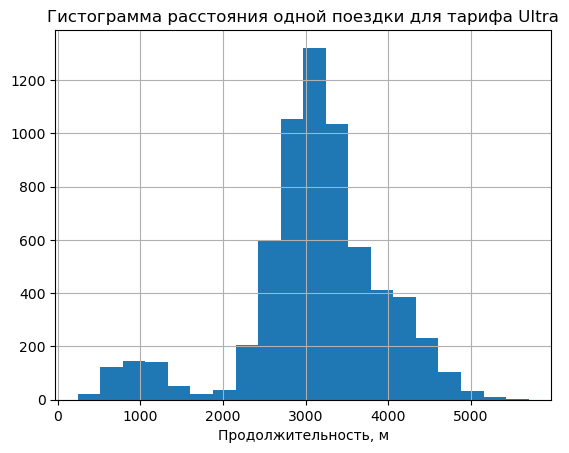

In [38]:
## Постороим гистограммы расстояния одной поездки для каждого тарифа
data_ultra['distance'].hist(bins=20)
plt.title('Гистограмма расстояния одной поездки для тарифа Ultra')
plt.xlabel('Продолжительность, м')
plt.show()

**Большинство пользователей с тарифом Ultra совершают поездки на расстояние 2,5-3,5 км, на втором месте поездки на 2-2,5 и 3,5-4,5 км. Коротких поездок до 2 км и длинных более 5 км немного**

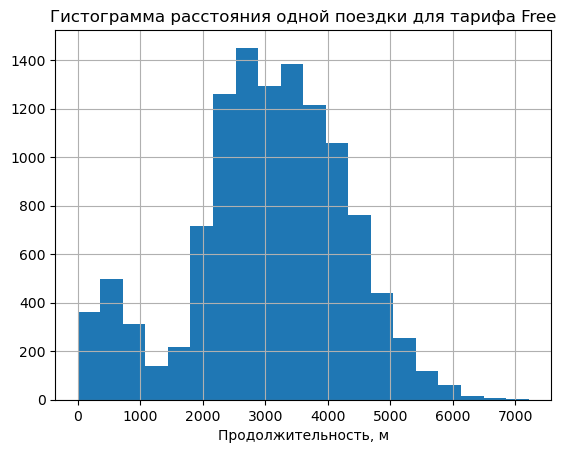

In [39]:
data_free['distance'].hist(bins=20)
plt.title('Гистограмма расстояния одной поездки для тарифа Free')
plt.xlabel('Продолжительность, м')
plt.show()

**Пользователии с тарифом Free в основном совершают поездки на расстояние 2,5-4,5 км, на втором месте короткие поездки до 2 км и поездки более 5 км**

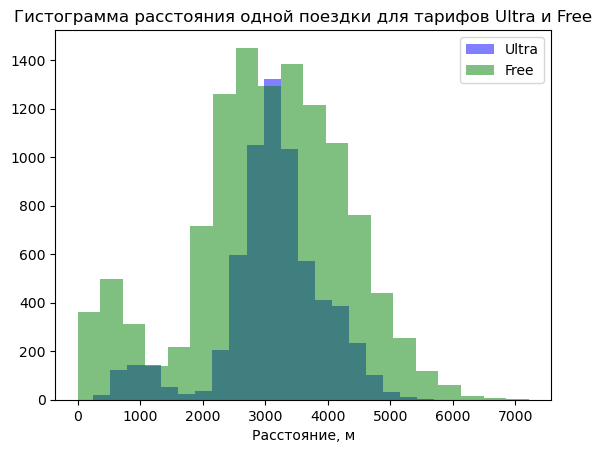

In [40]:
plt.hist(data_ultra['distance'], alpha=0.5, label='Ultra', bins=20, color='blue')
plt.hist(data_free['distance'], alpha=0.5, label='Free', bins=20, color='green')

plt.title('Гистограмма расстояния одной поездки для тарифов Ultra и Free')
plt.xlabel('Расстояние, м')
plt.legend()
plt.show()

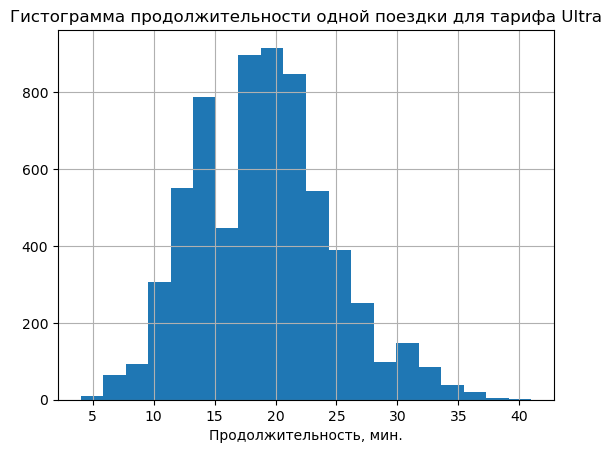

In [41]:
## Построим гистограмму длительности одной поездки для каждого тарифа
data_ultra['duration'].hist(bins=20)
plt.title('Гистограмма продолжительности одной поездки для тарифа Ultra')
plt.xlabel('Продолжительность, мин.')
plt.show()

**Пользователи с тарифом Ultra тратят на поездки в основном от 10 до 25 минут, есть также короткие поездки до 10 минут и длительные более 25 минут**

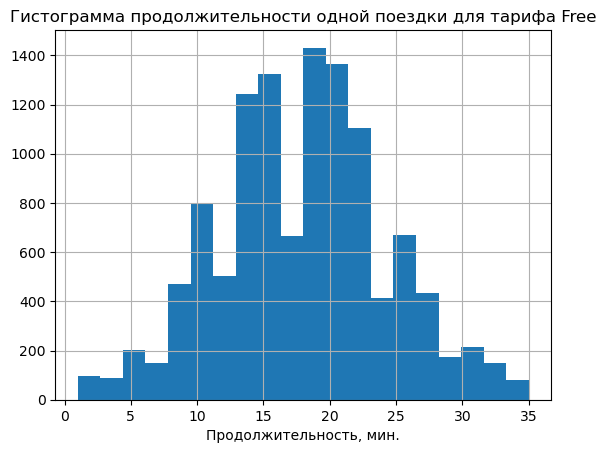

In [42]:
data_free['duration'].hist(bins=20)
plt.title('Гистограмма продолжительности одной поездки для тарифа Free')
plt.xlabel('Продолжительность, мин.')
plt.show()


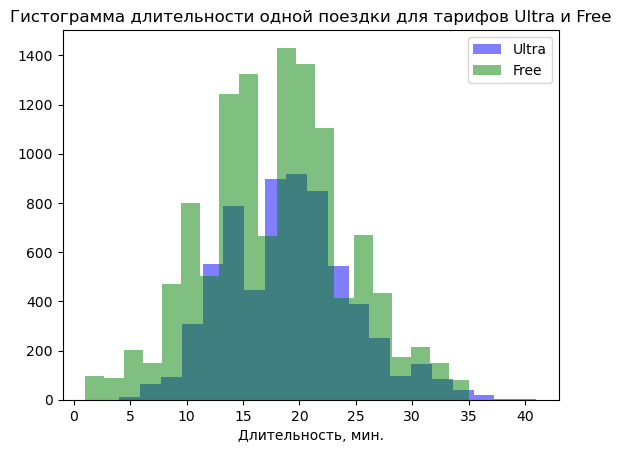

In [43]:
plt.hist(data_ultra['duration'], alpha=0.5, label='Ultra', bins=20, color='blue')
plt.hist(data_free['duration'], alpha=0.5, label='Free', bins=20, color='green')

plt.title('Гистограмма длительности одной поездки для тарифов Ultra и Free')
plt.xlabel('Длительность, мин.')
plt.legend()
plt.show()

**Для тарифа Free характерно нормальное распределение длительности поездок, наиболее распространенная длительность 15-20 минут, далее идет равномерное снижение/увеличение по обе стороны**

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными

###### Группируем данные по user_id и month, суммируем расстояние, количество поездок и время

In [58]:
user_month_free = data_free.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'rides': 'sum'
}).reset_index()

user_month_ultra = data_ultra.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'rides': 'sum'
}).reset_index()


,user_id,month,distance,duration,rides


###### Переименовываем столбцы

In [45]:
user_month_free = user_month_free.rename(columns={
    'distance': 'total_distance',
    'duration': 'total_duration',
    'rides_free': 'total_rides_free'
})

user_month_ultra = user_month_ultra.rename(columns={
    'distance': 'total_distance',
    'duration': 'total_duration',
    'rides_free': 'total_rides_ultra'
})

[Округление длительности поезок](#alfa)

##### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [50]:
data_all.head()

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,day,rides,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,NaT,NaN,NaN,NaN,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,NaT,NaN,NaN,NaN,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,NaT,NaN,NaN,NaN,1,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,NaT,NaN,NaN,NaN,1,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,NaT,NaN,NaN,NaN,1,6,0,199


In [52]:
data_all.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'year', 'month', 'day', 'rides', 'minute_price',
       'start_ride_price', 'subscription_fee'],
      dtype='object')

In [53]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               0 non-null      datetime64[ns]
 8   year               0 non-null      float64       
 9   month              0 non-null      float64       
 10  day                0 non-null      float64       
 11  rides              18068 non-null  int64         
 12  minute_price       18068 non-null  int64         
 13  start_ride_price   18068 non-null  int64         
 14  subscr

In [57]:
## Сформируем сводную таблицу
pivoted_table = pd.pivot_table(data_all,
                               index=['month', 'user_id'],
                               values=['distance', 'duration', 'rides'],
                               aggfunc={'distance': 'sum',
                                        'duration': 'sum',                                        
                                        'rides': 'sum'}
                              )
print(pivoted_table)

Empty DataFrame
Columns: []
Index: []


In [56]:
## Соединим сводную таблицу с данными о пользователях
pivoted_table_updated = pivoted_table.merge(data_us, on = 'user_id')
pivoted_table_updated.head(5)

,user_id,name,age,city,subscription_type


In [48]:
## Соединим сводную таблицу с даннымми о тарифах
pivoted_table_final = pivoted_table_updated.merge(data_sub, on ='subscription_type')
pivoted_table_final.head(5)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee


In [49]:
## Добавим столбец с расчетом суммы выручки
pivoted_table_final['pay'] = pivoted_table_final['duration']*pivoted_table_final['minute_price'] + pivoted_table_final['start_ride_price']*pivoted_table_final['rides']+pivoted_table_final['subscription_fee']
pivoted_table_final.head(5)

KeyError: 'duration'

In [ ]:
## Округлим данные
pivoted_table_final['duration'] = np.ceil(pivoted_table_final['duration']).astype(int)
pivoted_table_final['distance'] = np.ceil(pivoted_table_final['distance']).astype(int)
pivoted_table_final['pay'] = np.ceil(pivoted_table_final['pay']).astype(int)
pivoted_table_final.head(5)

#### Шаг 6. Проверка гипотез

##### Проверка гипотезы:  Тратят ли пользователи с подпиской больше времени на поездки

In [ ]:
# Разделим данные на две группы: с подпиской и без подписки

ultra = data_all[data_all['subscription_type'] == 'ultra']
free = data_all[data_all['subscription_type'] == 'free']


**Сформулируем гипотезы:**
- H0 : средняя продолжительность ultra['duration'] равна средняя продолжительность free['duration']
- H1 : средняя продолжительность ultra['duration']  > средняя продолжительность free['duration']

In [ ]:
## Проверим гипотезу

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(ultra['duration'], free['duration'], equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средняя продолжительность у тарифа Ultra больше чем у тарифа Free.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние продолжительности не различаются.') 

In [ ]:
display(ultra['duration'].mean().round())
display(free['duration'].mean().round())

**ВЫВОД: пользователи с подпиской тратят больше времени на поездки, следовательно они являются более привлекательными клиентами для компании**

##### Проверка гипотезы: Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката

**Сформулируем гипотезы:**
- H0 : средняя продолжительность ultra['duration'] = 3130
- H1 : средняя продолжительность ultra['duration'] > 3130

In [ ]:

ultra_mean = ultra['distance']

distance_3130 = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    ultra_mean, 
    distance_3130,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: среднее расстояние превышает', distance_3130, 'метров')
else:
    print('Не отвергаем нулевую гипотезу: среднее расстояние не превышает', distance_3130, 'метров') 



In [ ]:
## Выведем средние расстояния поездок для разных тарифов

display(ultra['distance'].mean().round())
display(free['distance'].mean().round())

**ВЫВОД: среднее расстояние одной поездки, которую совершают пользователи с подпиской не превышает 3130 м**

##### Проверка гипотезы: Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [ ]:
## Создадим выборки по подписке
ultra_pay = pivoted_table_final[pivoted_table_final['subscription_type'] == 'ultra']['pay']
free_pay = pivoted_table_final[pivoted_table_final['subscription_type'] == 'free']['pay']


**Сформулируем гипотезы:**
- H0 : средняя выручка ultra = средняя выручка free 
- H1 : средняя выручка ultra > средняя выручка free

In [ ]:
## Проверим гипотезы

alpha = 0.05

# T-test для средних значений
results = st.ttest_ind(ultra_pay, free_pay, equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: выручка от пользователей с подпиской выше')
else:
    print('Не получилось отвергнуть нулевую гипотезу: выручки не различаются')

**ВЫВОД: Выручка от пользователей с подпиской выше, чем от пользователей без подписки**

##### Проверка гипотезы: Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него

Для этого нужен тест о проверке Гипотезы о равенстве средних для зависимых (парных) выборок. В качестве первой выборки будут данные о количестве обращений до обновления сервера, в качестве второй - данные о количестве обращений после обновления сервера.
- Нулевая гипотеза (H0):

Разница между средними значениями выборок равна нулю (количество обращений не изменилось).

- Альтернативная гипотеза (H1):

Разница между средними значениями выборок не равна нулю (количество обращений изменилось).Среднее значение после обновления меньше среднего значения до обновления

Для проверки гипотез необходимо применить метод **scipy.stats.ttest_rel(alternative='greater')**

#### Шаг 7. Распределения

##### Задача: акция с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. Подберите параметры распределения, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [ ]:

# Параметры задачи
p = 0.10  # Вероятность продления подписки
k = 100   # Минимальное количество клиентов, которые должны продлить подписку
desired_probability = 0.05  # Вероятность не выполнить план


In [ ]:
# Создание списков для хранения значений N и вероятностей
N_values = []
probabilities = []

# Цикл для подбора значений N
for n in range(100, 1501):
    probability = binom.cdf(k - 1, n, p)
    
    # Проверка близости к желаемой вероятности
    if probability <= 0.05:  
        print(f"Минимальное количество промокодов: {n}")
        break
    
    # Добавление значений в списки для графика
    N_values.append(n)
    probabilities.append(probability)


In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(N_values, probabilities, label='Вероятность выполнения плана')
plt.axhline(y=desired_probability, color='red', linestyle='--', label='Желаемая вероятность')
plt.title('Зависимость вероятности выполнения плана от общего числа промокодов')
plt.xlabel('Общее количество промокодов (N)')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

**Вывод**

- Вероятность не выполнения плана (desired_probability): Установлено значение 0.05 (5%), что означает, что акция должна быть нацелена на то, чтобы примерно не более 5% клиентов не продлили подписку.

- Минимальное количество промокодов (N): На графике выделена точка, представляющая минимальное количество промокодов, при котором достигается или близка к желаемой вероятности.

- Красная пунктирная линия: Показывает вероятность не выполнения плана (5%).


##### Задача: отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [ ]:
## Параметры задачи
n = 1000000 ## количество разосланных уведомлений 
p = 0.4 ## вероятность открывания уведомлений
x = 399500 ## 
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тысяч уведомлений
result = round(distr.cdf(x), 2)
print(f"Вероятность того, что уведомление откроют не более {x} пользователей равна {result}")

In [ ]:
# Построение графика
x_values = np.linspace(0.2, 0.6)
y_values = distr.pdf(x_values * n)

plt.figure(figsize=(12, 6)) 
plt.plot(x_values * 1000, y_values, label='Нормальное распределение')
plt.fill_between(x_values * 1000, 0, y_values, where=(x_values <= x/n), color='red', alpha=0.4, label=f'Вероятность до {x} пользователей')

plt.title('Нормальное распределение для открытия уведомлений')
plt.xlabel('Количество пользователей, открывших уведомления (в тысячах)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

In [ ]:
    # Код ревьюера

s = np.random.normal(mu, sigma, 1000) # генерируем значения для нормального распределения


plt.hist(s, 30) # строим гистограмму
plt.title('Название графика')
plt.ylabel('Подпись оси y')
plt.xlabel('Подпись оси х')

plt.show()

- График визуализирует, что вероятность того, что менее 399,5 тысяч пользователей откроют уведомления, сосредоточена в левой части графика.

-  Использование нормального распределения является аппроксимацией для биномиального распределения с большим числом испытаний. В данном случае, это позволяет оценить вероятности для различных долей пользователей, которые могут открыть уведомления.


**Общий вывод по проекту:**

Анализ данных о пользователях сервиса аренды самокатов GoFast позволяет выделить несколько ключевых пунктов:

- Распределение пользователей по городам:

Больше всего пользователей зарегистрировано в городах Пятигорск, Ростов, Сочи и Краснодар, в то время как в Москве количество пользователей находится на низком уровне.

 - Подписка и без подписки:

Количество пользователей с подпиской и без подписки примерно равны (50/50).

- Возраст пользователей:

Распределение возрастов пользователей нормальное, с наиболее частым возрастом в районе 25 лет.

- Расстояния и длительность поездок:

Основные поездки составляют 2-4 км, что соответствует прогулкам на самокатах, также есть небольшая доля коротких поездок до 500 м, возможно это пробные поездки новых пользователей

Длительность поездок в основном варьируется в районе 20 минут.

- Тарифы Ultra и Free:

Пользователи с тарифом Ultra предпочитают короткие поездки в пределах 2,5-3,5 км, в то время как пользователи с тарифом Free выбирают расстояния от 2 до 4 км.
Пользователи с тарифом Ultra тратят больше времени на поездки по сравнению с пользователями Free.

- Выручка и подписки:

Пользователи с подпиской приносят больше выручки, чем пользователи без подписки.

**Рекомендации для бизнеса:**

- Маркетинг:

Уделите внимание городам с низким количеством пользователей, таким как Москва, и проведите активные маркетинговые кампании для привлечения новых пользователей.

- Подписки:

Продолжайте улучшать и продвигать программу подписок, так как пользователи с подпиской приносят больше выручки.

- Тарифы:

Рассмотрите возможность адаптации тарифов Ultra и Free с учетом предпочтений пользователей по расстояниям и длительности поездок.

- Привлечение новых пользователей:

Для увеличения вероятности выполнения маркетингового плана можно рассмотреть варианты увеличения общего количества промокодов, что может привести к более сбалансированным результатам.

- Удержание пользователей:

Исследуйте возможности увеличения удовлетворенности пользователя, что может повысить вероятность продления подписок и увеличить выручку.

**Заключение:**

В целом, бизнесу рекомендуется активно работать с городами, где меньше всего пользователей, строить маркетинговые кампании, улучшать программу подписок, адаптировать тарифы под предпочтения пользователей и стремиться к увеличению удовлетворенности клиентов для укрепления позиций на рынке аренды самокатов.